# Liver Disease Detection

Your liver is a vital organ that performs hundreds of tasks related to metabolism, energy storage, and waste filtering. It helps you digest food, convert it to energy, and store the energy until you need it. It also helps filter toxic substances out of your bloodstream.

Liver disease is a general term that refers to any condition affecting your liver. These conditions may develop for different reasons, but they can all damage your liver and affect its function.

# Import Dependencies

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import Data

In [20]:
dataset=pd.read_csv('liverdisease.csv', encoding =('ISO-8859-1'),low_memory =False)#utf-8 error

# EDA

# Attribute Information of Dataset

1) Age Age of the patient

2) Gender Gender of the patient

3) TB Total Bilirubin

4) DB Direct Bilirubin

5) Alkphos Alkaline Phosphotase

6) Sgpt Alamine Aminotransferase

7) Sgot Aspartate Aminotransferase

8) TP Total Protiens

9) ALB Albumin

10) A/G Ratio Albumin and Globulin Ratio

11) Selector field used to split the data into two sets (labeled by the experts) 1 Liver Patient, 2 Mon Liver Patient

In [21]:
dataset.shape

(30686, 11)

In [22]:
dataset.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [23]:
#checking the data type of each column
dataset.dtypes

Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30686 entries, 0 to 30685
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30684 non-null  float64
 1   Gender of the patient                 29785 non-null  object 
 2   Total Bilirubin                       30039 non-null  float64
 3   Direct Bilirubin                      30126 non-null  float64
 4    Alkphos Alkaline Phosphotase         29890 non-null  float64
 5    Sgpt Alamine Aminotransferase        30148 non-null  float64
 6   Sgot Aspartate Aminotransferase       30225 non-null  float64
 7   Total Protiens                        30223 non-null  float64
 8    ALB Albumin                          30192 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30127 non-null  float64
 10  Result                                30686 non-null  int64  
dtypes: float64(9), 

In [25]:
#checking for null values in the dataset
dataset.isna().sum()

Age of the patient                        2
Gender of the patient                   901
Total Bilirubin                         647
Direct Bilirubin                        560
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         461
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [26]:
#exploring the dataset
for col in dataset.columns:
    print(f'{col} : {dataset[col].unique()}')

Age of the patient : [65. 62. 58. 72. 46. 26. 29. 17. 55. 57. 64. 74. 61. 25. 38. 33. 40. 51.
 63. 34. 20. 84. 52. 30. 48. 47. 45. 42. 50. 85. 35. 21. 31. 54. 37. 66.
 60. 19. 75. 68. 70. 49. 32. 14. 13. 18. 39. 27. 36. 24. 28. 53. 15. 56.
 44. 41.  7. 22.  8.  6.  4. 43. 23. 12. 69. 16. 78. 11. 73. 67. 10. 90.
 77. 80. nan 89. 86. 83.]
Gender of the patient : ['Female' 'Male' nan]
Total Bilirubin : [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  4.1
  6.2  4.   2.6  1.3 14.2  1.4  2.4  6.8 18.4  3.1  8.9  0.8  2.8  2.
  5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.  23.
 22.7  nan  3.   1.7 11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  1.9  4.5
 75.  22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5
 16.4 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4
  7.4 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8
  5.5 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1
 25.  15. ]
Direct Bilirubin : 

In [27]:
#replacing the object values to integer values
dataset.replace({'Female':0,'Male':1},inplace=True)

In [38]:
dataset.dtypes

Age of the patient                      float64
Gender of the patient                   float64
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [28]:
#replacing null vaules with 
dataset.fillna(np.nan,inplace=True)

In [30]:
dataset.dropna(inplace=True)

In [44]:
#seperating the patients based on Liver Disease
Liver_Disease_patients,Mon_Liver_Disease_Patient=dataset['Result'].value_counts()

In [45]:
Liver_Disease_patients,Mon_Liver_Disease_Patient

(19477, 7680)

[Text(0, 0, '19477'), Text(0, 0, '7680')]

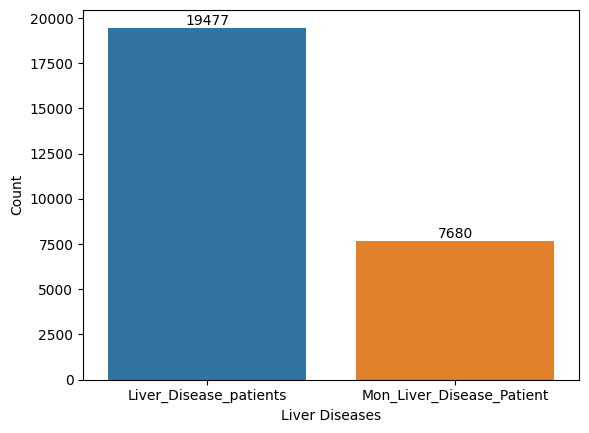

In [46]:

ax=sns.barplot(x=["Liver_Disease_patients","Mon_Liver_Disease_Patient"],y=[Liver_Patients,Mon_Liver_Patient])
plt.xlabel("Liver Diseases")
plt.ylabel("Count")
ax.bar_label(ax.containers[0])

# Over Sampling

In [63]:
Liver_Disease_patients=dataset[dataset['Result']==1]
Mon_Liver_Disease_Patient=dataset[dataset['Result']==2]
Liver_Disease_patients.shape,Mon_Liver_Disease_Patient.shape

((19477, 11), (7680, 11))

In [64]:
#creating new dataset by dublicating the values of the Mon_Liver_Disease_Patient dataset
new_Mon_Liver_Disease_Patient=Mon_Liver_Disease_Patient.sample(Liver_Disease_patients.shape[0],replace=True)
new_Mon_Liver_Disease_Patient.shape

(19477, 11)

In [69]:
#merging the two datasets
new_dataset=pd.concat([Liver_Disease_patients,new_Mon_Liver_Disease_Patient])

In [74]:
count_Liver_Disease_patients,count_Mon_Liver_Disease_Patient=new_dataset['Result'].value_counts()
count_Liver_Disease_patients,count_Mon_Liver_Disease_Patient

(19477, 19477)

[Text(0, 0, '19477'), Text(0, 0, '19477')]

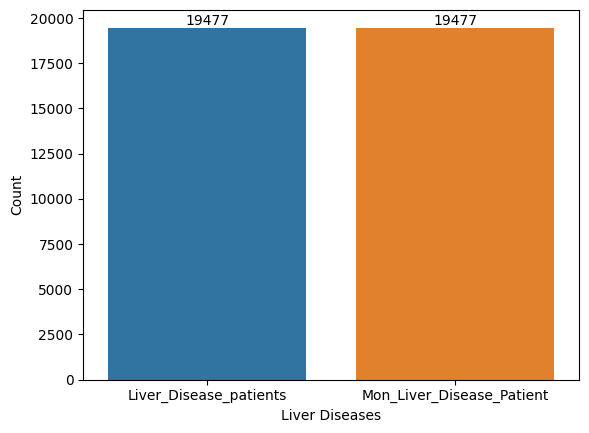

In [76]:
ax=sns.barplot(x=["Liver_Disease_patients","Mon_Liver_Disease_Patient"],y=[count_Liver_Disease_patients,count_Mon_Liver_Disease_Patient])
plt.xlabel("Liver Diseases")
plt.ylabel("Count")
ax.bar_label(ax.containers[0])

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27157 entries, 0 to 30685
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    27157 non-null  float64
 1   Gender of the patient                 27157 non-null  float64
 2   Total Bilirubin                       27157 non-null  float64
 3   Direct Bilirubin                      27157 non-null  float64
 4    Alkphos Alkaline Phosphotase         27157 non-null  float64
 5    Sgpt Alamine Aminotransferase        27157 non-null  float64
 6   Sgot Aspartate Aminotransferase       27157 non-null  float64
 7   Total Protiens                        27157 non-null  float64
 8    ALB Albumin                          27157 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  27157 non-null  float64
 10  Result                                27157 non-null  int64  
dtypes: float64(10),

[Text(0, 0, '10280'), Text(0, 0, '28674')]

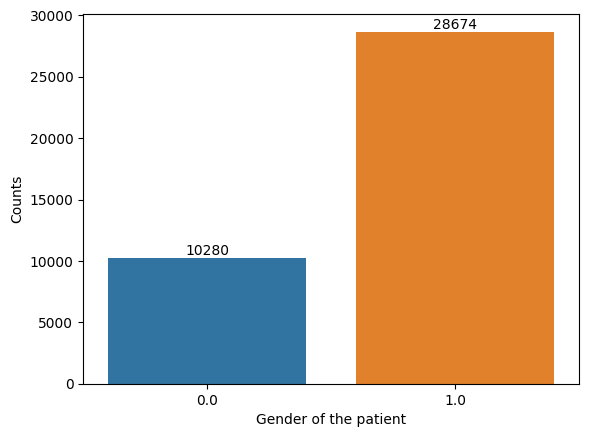

In [90]:
ax=sns.countplot(data=new_dataset, x = 'Gender of the patient', label='Count')
plt.xlabel("Gender of the patient")
plt.ylabel("Counts")
ax.bar_label(ax.containers[0])

In [93]:
new_dataset[['Gender of the patient', 'Result','Age of the patient']].groupby(['Result','Gender of the patient'], as_index=False).mean().sort_values(by='Result', ascending=False)

,Result,Gender of the patient,Age of the patient
2,2,0.0,43.193006
3,2,1.0,44.328299
0,1,0.0,43.364812
1,1,1.0,44.491964


# Spliting the data for training and testing

In [98]:
Data=new_dataset.drop(columns=['Result'])
Target=new_dataset['Result']
xtrain,xtest,ytrain,ytest=train_test_split(Data,Target,test_size=0.2)

In [99]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (31163, 10)
The shape of ytrain is (31163,)
The shape of xtest is (7791, 10)
The shape of ytest is (7791,)


In [100]:
#function to give accuracy,heatmap and confusion matrix
def Train_model(Algorithm_name,Algorithm):
    model=Algorithm
    model.fit(xtrain,ytrain)
    result=model.score(xtest,ytest)
    accuracy=result*100
    predicted_values=model.predict(xtest)
    predicted_values=predicted_values.astype(int)
    con_matrix=confusion_matrix(ytest,predicted_values)
    sns.heatmap(con_matrix,annot=True)
    print(f"BY using {Algorithm_name} Algorithm we get the accuray of {np.round(accuracy,2)}%")
    print(classification_report(ytest,predicted_values))

# Linear Regression

BY using Linear Regression Algorithm we get the accuray of 16.48%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.49      0.93      0.64      3926
           2       0.00      0.00      0.00      3865

    accuracy                           0.47      7791
   macro avg       0.16      0.31      0.21      7791
weighted avg       0.25      0.47      0.32      7791



C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\met

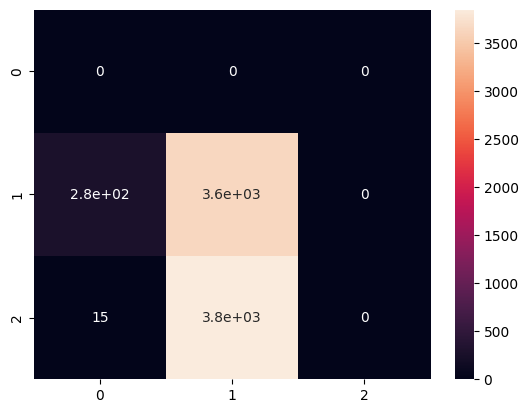

In [103]:
Train_model("Linear Regression",LinearRegression())

# Logistic Regression

BY using Logistic Regression Algorithm we get the accuray of 70.65%
              precision    recall  f1-score   support

           1       0.80      0.56      0.66      3926
           2       0.66      0.86      0.74      3865

    accuracy                           0.71      7791
   macro avg       0.73      0.71      0.70      7791
weighted avg       0.73      0.71      0.70      7791



C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


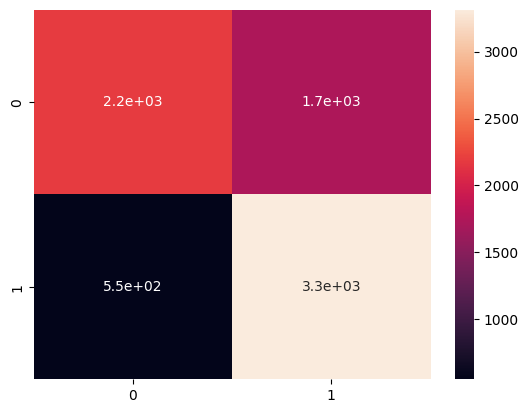

In [102]:
Train_model("Logistic Regression",LogisticRegression())

# Decision Tree Classifier

BY using Decision Tree Classifier Algorithm we get the accuray of 99.96%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3926
           2       1.00      1.00      1.00      3865

    accuracy                           1.00      7791
   macro avg       1.00      1.00      1.00      7791
weighted avg       1.00      1.00      1.00      7791



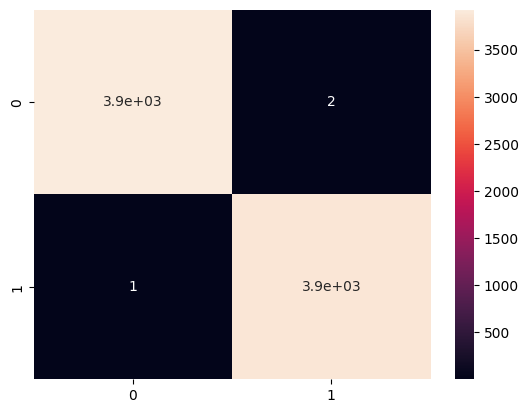

In [104]:
Train_model("Decision Tree Classifier",DecisionTreeClassifier())

# Random Forest Classifier

BY using Random Forest Classifier Algorithm we get the accuray of 99.97%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3926
           2       1.00      1.00      1.00      3865

    accuracy                           1.00      7791
   macro avg       1.00      1.00      1.00      7791
weighted avg       1.00      1.00      1.00      7791



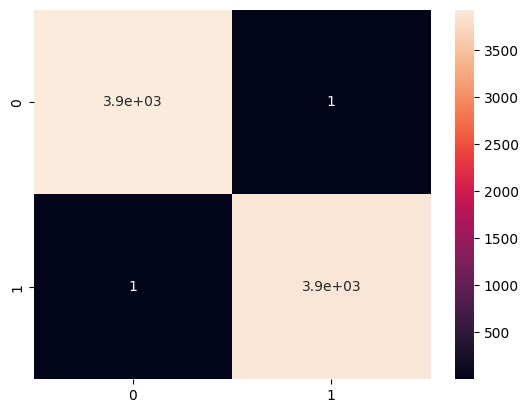

In [105]:
Train_model("Random Forest Classifier",RandomForestClassifier(n_estimators=60))

# SVC

BY using SVC Algorithm we get the accuray of 99.65%
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      3926
           2       1.00      0.99      1.00      3865

    accuracy                           1.00      7791
   macro avg       1.00      1.00      1.00      7791
weighted avg       1.00      1.00      1.00      7791



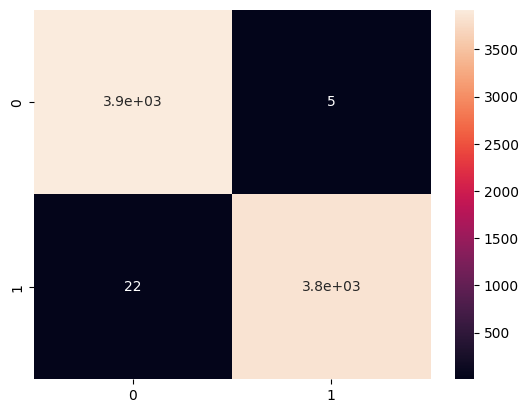

In [106]:
Train_model("SVC",SVC(C=1000,gamma=0.1))

# Visualising the accuracy of each Algorithm

[Text(0, 0, '16.48'),
 Text(0, 0, '70.65'),
 Text(0, 0, '99.96'),
 Text(0, 0, '99.97'),
 Text(0, 0, '99.65')]

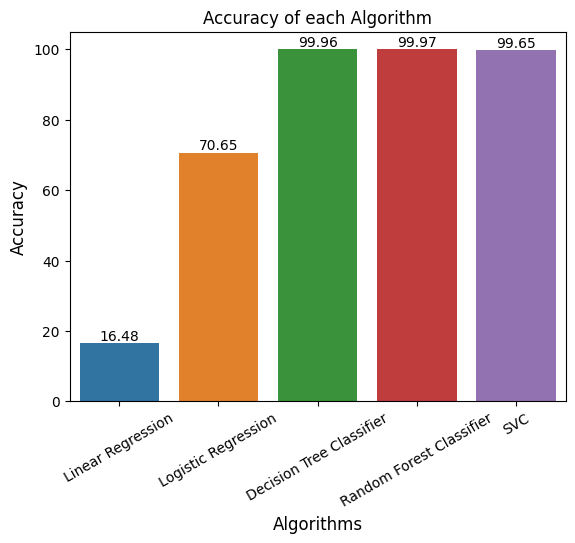

In [108]:
ax=sns.barplot(x=["Linear Regression","Logistic Regression","Decision Tree Classifier","Random Forest Classifier","SVC"],y=[16.48,70.65,99.96,99.97,99.65])
plt.xticks(rotation=30)
plt.title("Accuracy of each Algorithm")
plt.xlabel("Algorithms",size=12)
plt.ylabel("Accuracy",size=12)
ax.bar_label(ax.containers[0])

# Random Forst Classifier

we can seen in the above graph that Random Forset Classifier has highest Accuracy of 99.97%

BY using <class 'sklearn.ensemble._forest.RandomForestClassifier'> Algorithm we get the accuray of 99.97%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3926
           2       1.00      1.00      1.00      3865

    accuracy                           1.00      7791
   macro avg       1.00      1.00      1.00      7791
weighted avg       1.00      1.00      1.00      7791



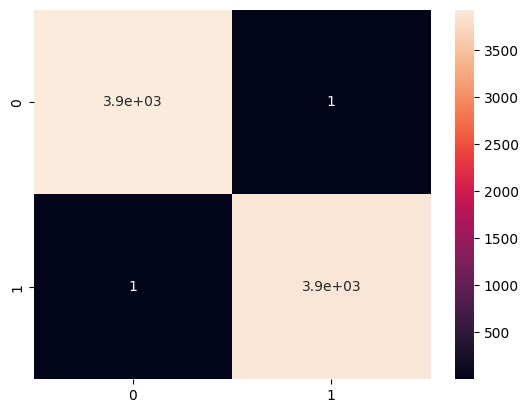

In [109]:
model=RandomForestClassifier(n_estimators=60)
model.fit(xtrain,ytrain)
result=model.score(xtest,ytest)
accuracy=result*100
predicted_values=model.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using {RandomForestClassifier} Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

In [110]:
import pickle as p
p.dump(model,open("LiverDisease.p","wb"))